In [9]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [10]:
x = sp.symbols("x")
y = (x + 3) ** 3
y_derive = sp.diff(y, x)

In [11]:
y_neumeric = sp.lambdify(x, y, 'numpy')
y_derive_neumeric = sp.lambdify(x, y_derive, 'numpy')

In [16]:
learning_rate = 0.01
initial_x = 2  # Starting point
precision = 1e-6  # Threshold for convergence
max_iters = 100  # Maximum number of iterations

In [17]:
x_values = [initial_x]
y_values = [y_neumeric(initial_x)]

In [18]:
x_current = initial_x

for i in range(max_iters):
    gradient = y_derive_neumeric(x_current)
    x_next = x_current - learning_rate * gradient
    
    x_values.append(x_next)
    y_values.append(y_neumeric(x_next))
    
    if abs(x_next - x_current) < precision:
        print(f'Converged in {i+1} iterations.')
        break
    x_current = x_next

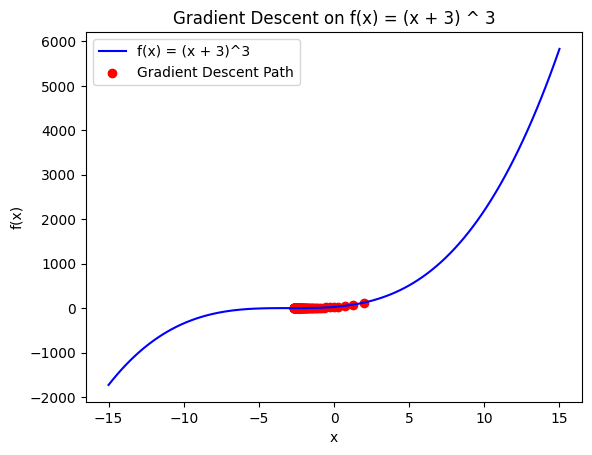

In [20]:
x_range = np.linspace(-15,15,100)
plt.plot(x_range, y_neumeric(x_range), label="f(x) = (x + 3)^3", color="blue")
plt.scatter(x_values, y_values, color="red", label="Gradient Descent Path")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent on f(x) = (x + 3) ^ 3')
plt.legend()
plt.show()